In [1]:
import numpy as np

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Set up retina
r_sampling = 250  # spatial sampling of retina
xhi = 1500
yhi = 1500
retina = e2cm.Retina(sampling=r_sampling, xlo=-xhi, xhi=xhi,
                     ylo=-yhi, yhi=yhi)

In [3]:
# Set up electrode array
curr_thresh = 22.0

implant = e2cm.ElectrodeArray('epiretinal', 260, 0, 0, 100)

# Set up temporal model
tsample = 5e-6
tm = ec2b.TemporalModel(tsample)

In [4]:
# Pulse train used in Nanduri et al. (2012)
def get_pulse_train(freq, curr, tsample):
    return e2cm.Psycho2Pulsetrain(freq=freq, amp=curr,
                                  dur=0.5, pulse_dur=0.45/1000,
                                  interphase_dur=0.45/1000,
                                  delay=0, tsample=tsample,
                                  pulsetype='cathodicfirst')

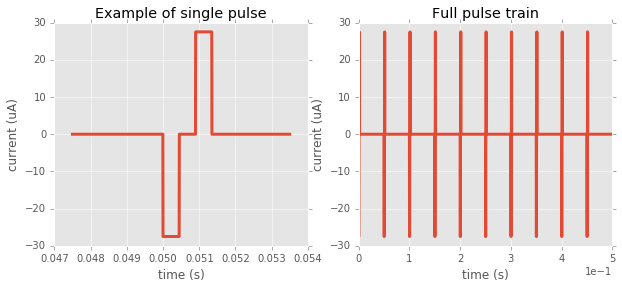

In [5]:
pulse_train = get_pulse_train(20, 1.25 * curr_thresh, tsample)
t = np.arange(pulse_train.data.size) * tsample

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t[9500:10700], pulse_train.data[9500:10700], linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Example of single pulse')

plt.subplot(122)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(t, pulse_train.data, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Full pulse train')

In [6]:
# Nanduri 2012 data

# input amplitude values (x threshold) and expected output (brightness)
all_amps = np.array([1.25, 1.5, 2, 4, 6]) * curr_thresh
out_amps = np.array([10, 15, 18, 19, 19])

# input frequency values and expected output
all_freqs = np.array([13, 20, 27, 40, 80, 120])
out_freqs = np.array([7.3, 10, 13, 19, 34, 51])

2017-02-14 14:35:13,608 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:35:20,647 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:35:27,418 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:35:34,307 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:35:41,201 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected


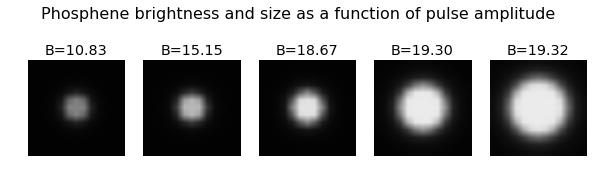

In [7]:
# Run the model on different amplitude values.
# We use current spread instead of effective current spread (use_ecs=False) in order to simulate the
# Nanduri conditions.
plt.figure(figsize=(10, 3))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'amplitude',
             fontsize=16)
bright_amp = []
for i, ampl in enumerate(all_amps):
    stim = get_pulse_train(20, ampl, tsample)
    resp = ec2b.pulse2percept(stim, implant, tm, retina, use_ecs=False,
                              n_jobs=8, dojit=True, tol=0.01)
    bright_amp.append(resp.data.max())
    
    plt.subplot(1, len(all_amps), i + 1)
    frame = ec2b.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=21)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
plt.savefig('size-amps.png')

bright_amp = np.array(bright_amp)

2017-02-14 14:35:48,402 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:35:53,395 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:36:00,300 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:36:09,725 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:36:23,035 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected
2017-02-14 14:36:48,844 [pulse2percept.effectivecurrent2brightness] [INFO] tol=1.0%, 169/169 px selected


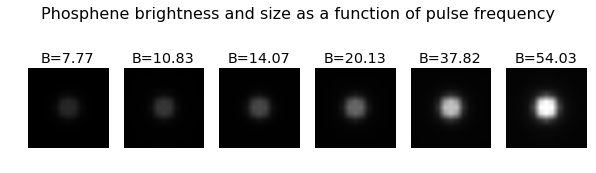

In [8]:
# Run the model on different frequency values
plt.figure(figsize=(10, 3))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'frequency',
             fontsize=16)
bright_freq = []
for i, freq in enumerate(all_freqs):
    stim = get_pulse_train(freq, 1.25 * curr_thresh, tsample)
    resp = ec2b.pulse2percept(stim, implant, tm, retina, use_ecs=False,
                              n_jobs=8, dojit=True, tol=0.01)
    bright_freq.append(resp.data.max())
    plt.subplot(1, len(all_freqs), i + 1)

    frame = ec2b.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=50)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
plt.savefig('size-freqs.png')

bright_freq = np.array(bright_freq)

(0, 150)

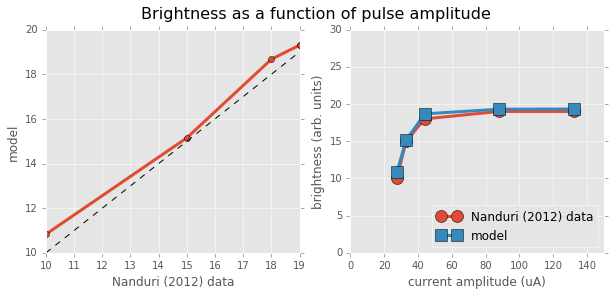

In [9]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse amplitude', fontsize=16)

plt.subplot(121)
plt.plot(out_amps, bright_amp, 'o-', linewidth=3)
plt.plot([out_amps[0], out_amps[-1]], [out_amps[0], out_amps[-1]], '--k')
plt.xlabel('Nanduri (2012) data')
plt.ylabel('model')

plt.subplot(122)
plt.plot(all_amps, out_amps, '-o', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_amps, bright_amp, '-s', linewidth=3, markersize=12,
         label='model')
plt.xlabel('current amplitude (uA)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.ylim(0, 30)
plt.xlim(0, 150)

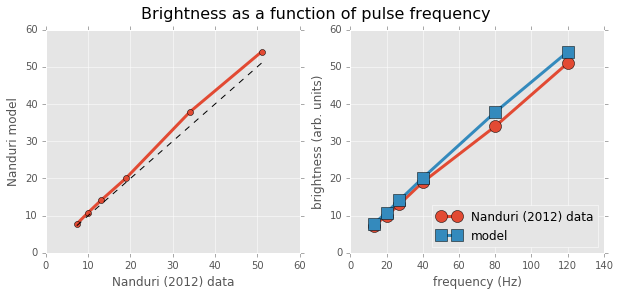

In [10]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse frequency', fontsize=16)

plt.subplot(121)
plt.plot(out_freqs, bright_freq, 'o-', linewidth=3)
plt.plot([out_freqs[0], out_freqs[-1]], [out_freqs[0], out_freqs[-1]],
         '--k')
plt.xlabel('Nanduri (2012) data')
plt.ylabel('Nanduri model')

plt.subplot(122)
plt.plot(all_freqs, out_freqs, '-o', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_freqs, bright_freq, '-s', linewidth=3, markersize=12,
         label='model')
plt.xlabel('frequency (Hz)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.xlim(0, 140)
plt.savefig('nanduri-freqs.png')